In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysolver as solver

# Damped Oscillation

In [2]:
def oscillator(t,y,K,M,L):
        """
        The derivate function for an oscillator
        In this example, we set

        y[0] = x
        y[1] = v

        yderive[0] = x' = v
        yderive[1] = v' = a

        :param t: the time
        :param y: the input values
        :param K: the spring constant
        :param M: the mass of the oscillator
        :param L: the damping constant
        :param args: extra parameters, here args=(K,M,L) 

        """
        
        yder = np.zeros(len(y))
        yder[0] = y[1]
        yder[1] = -2*(L/(2*M))*y[1]+(-K/M)*y[0]

        return yder

In [3]:
A=1
K=1
M=1
L=0.2
phi=-np.pi/2
gamma=(L/(2*M))
omega0=np.sqrt(K/M)
omega1=np.sqrt(abs(gamma**2-omega0**2))

t_span = (0, 20)
y0     = np.array([0,A*omega1])
t_eval = np.linspace(0,20,1000)

In [4]:
# Solve your IVP here
sol_euler = solver.solve_ivp(oscillator, t_span, y0, method="Euler",t_eval=t_eval, args=(K,M,L))

In [5]:
sol_rk2 = solver.solve_ivp(oscillator, t_span, y0, method="RK2",t_eval=t_eval, args=(K,M,L))

In [6]:
sol_rk4 = solver.solve_ivp(oscillator, t_span, y0, method="RK4",t_eval=t_eval, args=(K,M,L))

# Analytical Solution

In [7]:
# Calculate analytical solution here
anatime = t_eval
ana_posx = A * np.exp(-gamma*anatime)*np.cos(omega1*anatime+phi)

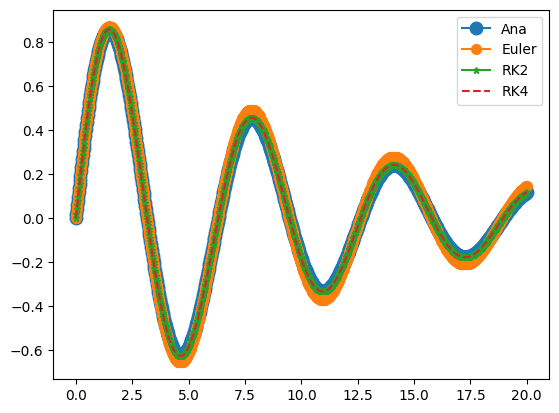

In [8]:
# Visualize your solution here
plt.figure(1)
plt.plot(anatime,ana_posx, '-o', label="Ana",markersize=9)
plt.plot(t_eval,sol_euler[0], '-o',label="Euler",markersize=7)
plt.plot(t_eval,sol_rk2[0], '-*',label="RK2", markersize=5)
plt.plot(t_eval,sol_rk4[0],'--',label="RK4",markersize=3)
plt.legend()
